# **Machine Learning Techniques Project**


*   Nicolas Bedoya Figueroa
*   Daniel Escalante Perez
*   Marilyn Stephany Joven Fonseca
*   Eder Leandro Carbonero Baquero

## **Preconditions**

In [1]:
!pip install nltk pyspellchecker tqdm emoji nlpaug transformers tensorflow xgboost[gpu] accelerate

zsh:1: no matches found: xgboost[gpu]


In [2]:
!pip install seaborn transformers torch tqdm umap-learn plotly

Defaulting to user installation because normal site-packages is not writeable


## CNN
**Eder Leandro Carbonero Baquero**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

/Users/eventsequor/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Carga de datos

In [4]:
# Cargar el archivo CSV
df_cnn = pd.read_csv('data/embeddings_data.csv')

# Asegurarse de que los embeddings son listas de números
X = np.array(df_cnn['embedding_mean'].apply(eval).tolist())  # Convertir de string a lista
y = np.array(df_cnn['class'])  # Etiquetas: 0 o 1

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas antes de hacer reshape
print(f"Forma de X_train antes del reshape: {X_train.shape}")
print(f"Forma de X_test antes del reshape: {X_test.shape}")

# Asegurarse de que los datos tengan la forma correcta (n_samples, sequence_length, n_channels)
# Aquí asumimos que el tamaño de los embeddings es 768
X_train = X_train.reshape((X_train.shape[0], 768, 1))  # Reshape de X_train
X_test = X_test.reshape((X_test.shape[0], 768, 1))  # Reshape de X_test

# Verificar las formas después del reshape
print(f"Forma de X_train después del reshape: {X_train.shape}")
print(f"Forma de X_test después del reshape: {X_test.shape}")

# Asegurarse de que los datos tengan la forma correcta (n_samples, sequence_length, n_channels)
# Aquí asumimos que el tamaño de los embeddings es 768
X_train = X_train.reshape((X_train.shape[0], 768, 1))  # Reshape de X_train
X_test = X_test.reshape((X_test.shape[0], 768, 1))  # Reshape de X_test

Forma de X_train antes del reshape: (38164, 768)
Forma de X_test antes del reshape: (9541, 768)
Forma de X_train después del reshape: (38164, 768, 1)
Forma de X_test después del reshape: (9541, 768, 1)


### Creación de capas - 3

In [5]:
# Crear el modelo
model = models.Sequential()

# Capa convolucional 1
model.add(layers.Conv1D(64, 3, activation='relu', input_shape=(768, 1)))  # 768 dimensiones de embedding
model.add(layers.MaxPooling1D(2))  # MaxPooling para reducir la dimensionalidad
model.add(layers.Dropout(0.3))  # Dropout para evitar sobreajuste

# Capa convolucional 2
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))  # MaxPooling para reducir la dimensionalidad
model.add(layers.Dropout(0.3))  # Dropout para evitar sobreajuste

# Capa convolucional 3
model.add(layers.Conv1D(256, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))  # MaxPooling para reducir la dimensionalidad
model.add(layers.Dropout(0.3))  # Dropout para evitar sobreajuste

# Aplanar los resultados
model.add(layers.Flatten())

# Capa densa intermedia
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout para evitar sobreajuste

# Capa de salida
model.add(layers.Dense(1, activation='sigmoid'))  # Salida binaria (0 o 1)

# Compilar el modelo
optimizer = Adam(learning_rate=0.0005)  # Ajuste de la tasa de aprendizaje
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Mostrar el resumen del modelo
model.summary()


/Users/eventsequor/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 766, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 383, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 383, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 381, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 190, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 190, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 188, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 94, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 94, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 24064)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,080,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,203,969 (12.22 MB)

 Trainable params: 3,203,969 (12.22 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Configuración de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo con EarlyStopping
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/30
955/955 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.7360 - loss: 0.5104 - precision: 0.7555 - recall: 0.7265 - val_accuracy: 0.8368 - val_loss: 0.3626 - val_precision: 0.8984 - val_recall: 0.7684
Epoch 2/30
955/955 ━━━━━━━━━━━━━━━━━━━━ 30s 31ms/step - accuracy: 0.8350 - loss: 0.3755 - precision: 0.8821 - recall: 0.7814 - val_accuracy: 0.8465 - val_loss: 0.3458 - val_precision: 0.9018 - val_recall: 0.7860
Epoch 3/30
955/955 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.8438 - loss: 0.3610 - precision: 0.8952 - recall: 0.7881 - val_accuracy: 0.8461 - val_loss: 0.3411 - val_precision: 0.9251 - val_recall: 0.7612
Epoch 4/30
955/955 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8508 - loss: 0.3466 - precision: 0.9064 - recall: 0.7892 - val_accuracy: 0.8503 - val_loss: 0.3355 - val_precision: 0.8794 - val_recall: 0.8203
Epoch 5/30
955/955 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.8520 - loss: 0.3376 - precision: 0.9009 - recall: 0.7931 - val_accuracy: 0.8562 - va

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Obtener las predicciones del modelo
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Umbral para clasificación binaria

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.8610
Precision: 0.9190
Recall: 0.7991
F1 Score: 0.8549


### Análisis de resultados

#### Curvas de Aprendizaje 

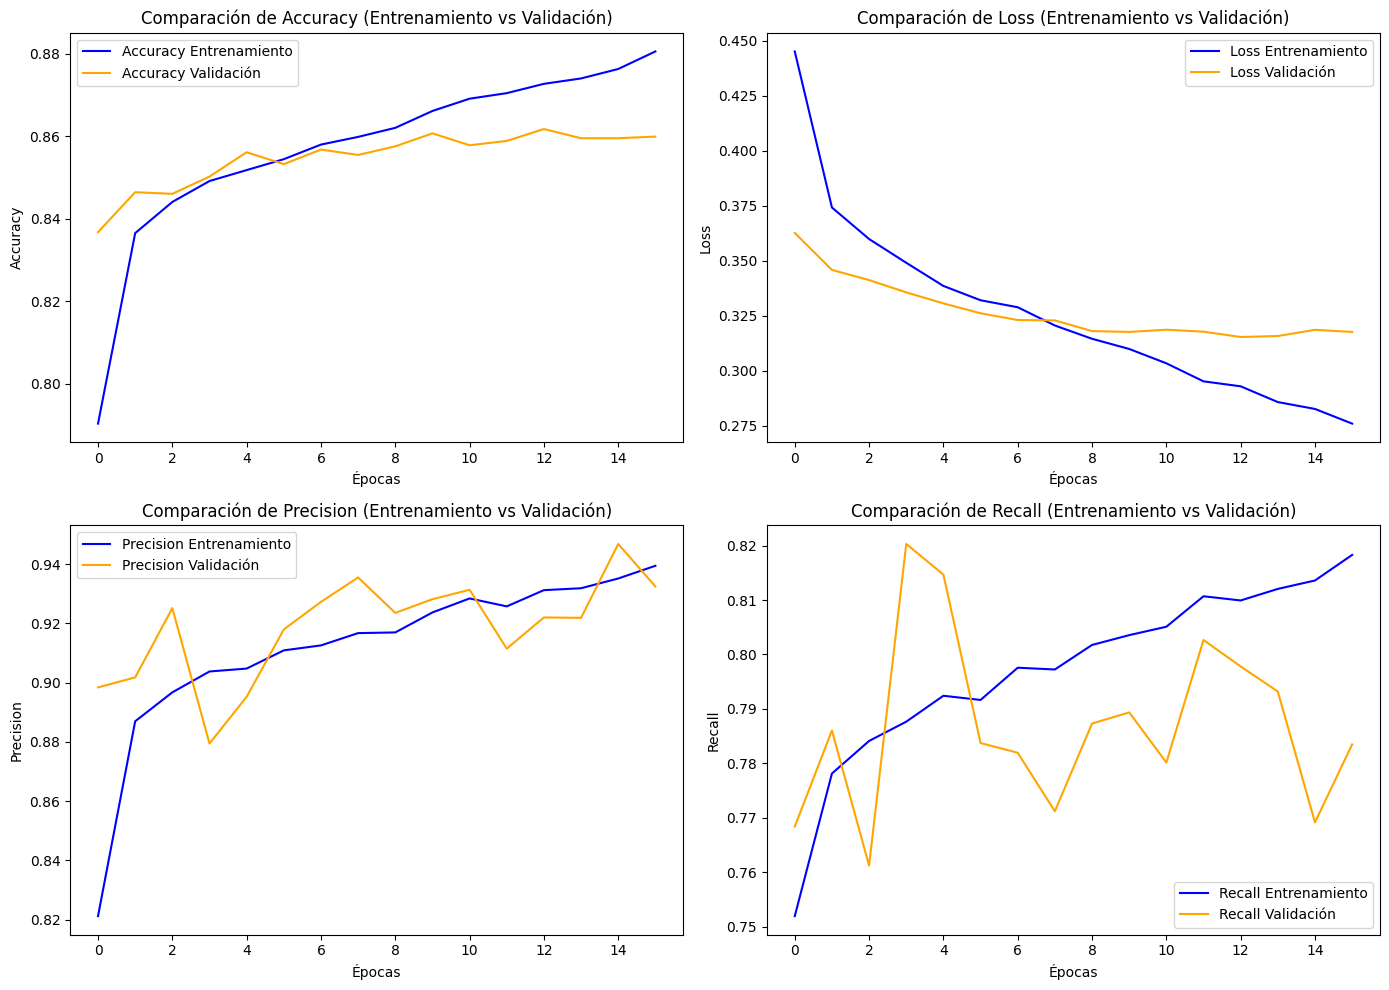

In [8]:
# Historial de métricas durante el entrenamiento (history.history)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_precision = history.history['precision']
val_precision = history.history['val_precision']
train_recall = history.history['recall']
val_recall = history.history['val_recall']

# Crear la figura para las subgráficas
plt.figure(figsize=(14, 10))

# Gráfico 1: Accuracy
plt.subplot(2, 2, 1)
plt.plot(train_accuracy, label='Accuracy Entrenamiento', color='blue')
plt.plot(val_accuracy, label='Accuracy Validación', color='orange')
plt.title('Comparación de Accuracy (Entrenamiento vs Validación)')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico 2: Loss
plt.subplot(2, 2, 2)
plt.plot(train_loss, label='Loss Entrenamiento', color='blue')
plt.plot(val_loss, label='Loss Validación', color='orange')
plt.title('Comparación de Loss (Entrenamiento vs Validación)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Gráfico 3: Precision
plt.subplot(2, 2, 3)
plt.plot(train_precision, label='Precision Entrenamiento', color='blue')
plt.plot(val_precision, label='Precision Validación', color='orange')
plt.title('Comparación de Precision (Entrenamiento vs Validación)')
plt.xlabel('Épocas')
plt.ylabel('Precision')
plt.legend()

# Gráfico 4: Recall
plt.subplot(2, 2, 4)
plt.plot(train_recall, label='Recall Entrenamiento', color='blue')
plt.plot(val_recall, label='Recall Validación', color='orange')
plt.title('Comparación de Recall (Entrenamiento vs Validación)')
plt.xlabel('Épocas')
plt.ylabel('Recall')
plt.legend()

# Ajuste de diseño
plt.tight_layout()
plt.show()

#### Matriz de Confusión
La matriz de confusión te muestra los falsos positivos (FP), falsos negativos (FN), verdaderos positivos (VP), y verdaderos negativos (VN).

VP: Tweets de hate speech correctamente clasificados.

VN: Tweets de no hate speech correctamente clasificados.

FP: Tweets de no hate speech clasificados incorrectamente como hate speech.

FN: Tweets de hate speech clasificados incorrectamente como no hate speech.

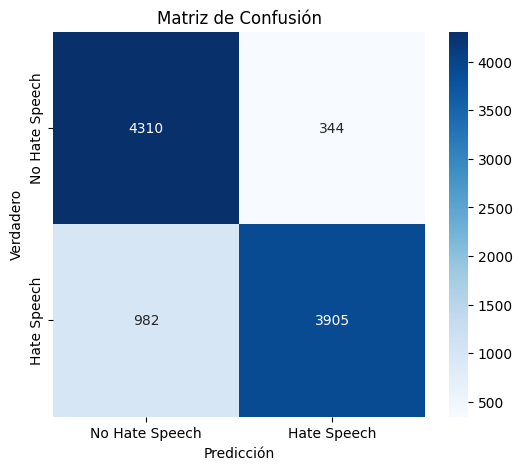

Matriz de Confusión:
[[4310  344]
 [ 982 3905]]


In [9]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un mapa de calor (heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Hate Speech", "Hate Speech"], yticklabels=["No Hate Speech", "Hate Speech"])
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir la matriz de confusión en formato texto
print("Matriz de Confusión:")
print(cm)

#### Curva ROC y AUC

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


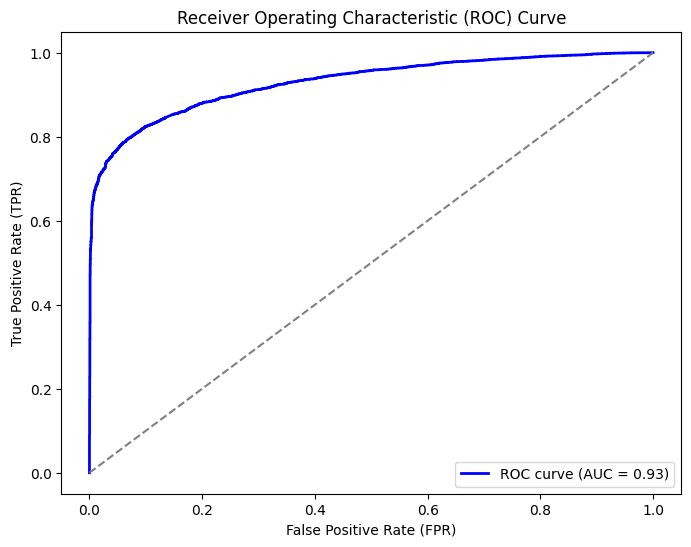

In [10]:
# Calcular las probabilidades de la clase positiva (Hate Speech)
y_prob = model.predict(X_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

Guardar el modelo

In [11]:
# Guardar el modelo entrenado en un archivo
model.save('cnn_trained_model.h5')

### Predicción dada una frase

In [12]:
# Cargar el tokenizador y el modelo de cardiffnlp/twitter-roberta-base
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base")
model_roberta = AutoModel.from_pretrained("cardiffnlp/twitter-roberta-base")

# Función para obtener el embedding de un texto
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model_roberta(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

# Función para predecir si es hate speech
def predict_hate_speech(text, model):
    # Obtener el embedding del texto
    embedding = get_embedding(text)
    
    # Redimensionar el embedding para que tenga la forma adecuada
    embedding = embedding.reshape(1, -1)  # Forma (1, emb_size)
    
    # Asegurarse de que el modelo esté cargado correctamente
    if model is None:
        raise ValueError("El modelo no está cargado correctamente.")
    
    # Predicción con el modelo
    prediction = model.predict(embedding)
    
    # Clasificación: 0 = no hate speech, 1 = hate speech
    if prediction > 0.5:
        return "Hate Speech"
    else:
        return "No Hate Speech"

In [13]:
# Cargar el modelo previamente entrenado
model = tf.keras.models.load_model('cnn_trained_model.h5')  # Asegúrate de tener el modelo entrenado cargado
# Test de predicción
text = "bitch eat shit all day"  # Texto de ejemplo
result = predict_hate_speech(text, model)
print(f"Predicción: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicción: Hate Speech


### Guardar datos

In [16]:
# Definir el nombre del archivo CSV
csv_filename = 'resultados_metricas.csv'

# Verificar si el archivo CSV ya existe
try:
    # Leer el CSV existente (si existe)
    df = pd.read_csv(csv_filename)
except FileNotFoundError:
    # Si el archivo no existe, crear uno nuevo con las columnas correspondientes
    df = pd.DataFrame(columns=['modelo', 'accuracy', 'precision', 'recall', 'f1_score'])

# Nombre del modelo que quieres guardar (puede ser el nombre de tu modelo o cualquier identificador)
modelo_nombre = 'CNN_HateSpeech_Model'

# Crear una nueva fila con los resultados
new_row = pd.DataFrame({
    'modelo': [modelo_nombre],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1_score': [f1]
})

# Usar pd.concat() para agregar la nueva fila al DataFrame
df = pd.concat([df, new_row], ignore_index=True)

# Guardar el DataFrame actualizado en el CSV
df.to_csv(csv_filename, index=False)

# Confirmación
print(f"Resultados guardados en {csv_filename}")

Resultados guardados en resultados_metricas.csv
